# 1.1 Ziele  

- Erweiterung unserer Regressionsmodell-Routinen zur Unterstützung mehrerer Merkmale  
- Erweiterung der Datenstrukturen zur Unterstützung mehrerer Merkmale  
- Neuschreiben der Vorhersage-, Kosten- und Gradienten-Routinen zur Unterstützung mehrerer Merkmale  
- Nutzung von `np.dot` in NumPy zur Vektorisierung der Implementierungen für höhere Geschwindigkeit und Einfachheit  


# 1.2 Werkzeuge  

In diesem Lab werden wir folgende Werkzeuge verwenden:  

- **NumPy** – eine beliebte Bibliothek für wissenschaftliches Rechnen  
- **Matplotlib** – eine weit verbreitete Bibliothek zur Visualisierung von Daten  


In [20]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
np.set_printoptions(precision=2)

### - Informationen zu den importierten Bibliotheken

**`copy`-Modul**
Das `copy`-Modul in Python wird verwendet, um Kopien von Objekten zu erstellen. Es bietet zwei Hauptfunktionen:
- `copy.copy()` für eine flache Kopie (shallow copy), bei der nur die oberste Ebene dupliziert wird.
- `copy.deepcopy()` für eine tiefe Kopie (deep copy), bei der auch geschachtelte Strukturen vollständig dupliziert werden.

---
**`math`-Modul**
Das `math`-Modul stellt mathematische Funktionen und Konstanten bereit. Dazu gehören unter anderem:
- Grundlegende mathematische Operationen wie Wurzeln, Potenzen und Logarithmen.
- Trigonometrische Funktionen wie Sinus, Kosinus und Tangens.
- Mathematische Konstanten wie `math.pi` für π oder `math.e` für die Euler-Zahl.

---
**`plt.style.use('fivethirtyeight')`**  
Die Funktion `plt.style.use('fivethirtyeight')` wendet den **"FiveThirtyEight"-Stil** auf Matplotlib-Diagramme an.  
Dieser Stil ist inspiriert vom gleichnamigen Datenjournalismus-Portal und zeichnet sich durch klare, minimalistische Designs mit gut sichtbaren Gitternetzlinien aus.  

**Merkmale:**  
- Helle Hintergrundfarbe mit grauen Gitternetzlinien  
- Dickere Linien für bessere Sichtbarkeit  
- Weniger Achsenrahmen für eine modernere Optik  

---
**`np.set_printoptions(precision=2)`**  
Die Funktion `np.set_printoptions(precision=2)` legt die Anzeigepräzision für `numpy`-Arrays fest.  

**Effekte:**  
- Fließkommazahlen werden mit **zwei Dezimalstellen** dargestellt.  
- Die tatsächlichen Werte im Speicher bleiben jedoch unverändert.  
- Spart die explizite Formatierung mit `:.2f` beim Drucken von Arrays.

# 1.3 Notation  

Hier ist eine Übersicht über einige der Notationen, die Ihnen begegnen werden, aktualisiert für mehrere Merkmale.


### Allgemeine Notation  

| Notation | Beschreibung | Python (falls zutreffend) |
|----------|-------------|---------------------------|
| 𝑎        | Skalar, nicht fett | |
| **𝐚**    | Vektor, fett | |
| **𝐀**    | Matrix, fett und groß geschrieben | |

### Regression  

| Notation | Beschreibung | Python (falls zutreffend) |
|----------|-------------|---------------------------|
| **𝐗**    | Trainingsbeispiel-Matrix | `X_train` |
| **𝐲**    | Zielwerte der Trainingsbeispiele | `y_train` |
| **𝐱(𝑖)**, 𝑦(𝑖) | 𝑖-tes Trainingsbeispiel | `X[i]`, `y[i]` |
| 𝑚        | Anzahl der Trainingsbeispiele | `m` |
| 𝑛        | Anzahl der Merkmale pro Beispiel | `n` |
| **𝐰**    | Parameter: Gewichte | `w` |
| 𝑏        | Parameter: Bias | `b` |
| 𝑓(𝐱(𝑖)) | Ergebnis der Modellbewertung bei **𝐱(𝑖)**, parametrisiert durch **𝐰,𝑏** : $ f_{\mathbf{w}, b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b $ |`f_wb` |



# 2 Problemstellung  

Wir werden das Beispiel der Vorhersage von Immobilienpreisen verwenden.  

Der Trainingsdatensatz enthält drei Beispiele mit vier Merkmalen (Größe, Anzahl der Schlafzimmer, Anzahl der Stockwerke und Alter des Hauses), die in der folgenden Tabelle dargestellt sind.  

Beachte, dass – im Gegensatz zu den vorherigen Übungen – die Größe in **Quadratfuß (sqft)** angegeben ist und nicht in **1000 sqft**. Dies führt zu einem Problem, das im nächsten Lab gelöst wird!  

| Größe (sqft) | Anzahl der Schlafzimmer | Anzahl der Stockwerke | Alter des Hauses | Preis (in 1000 Dollar) |
|-------------|----------------------|------------------|----------------|----------------------|
| 2104       | 5                    | 1                | 45             | 460                  |
| 1416       | 3                    | 2                | 40             | 232                  |
| 852        | 2                    | 1                | 35             | 178                  |

Wir werden ein lineares Regressionsmodell aufbauen, um auf Basis dieser Werte die Preise weiterer Häuser vorherzusagen.  

Zum Beispiel für ein Haus mit **1200 sqft**, **3 Schlafzimmern**, **1 Stockwerk** und **40 Jahren Alter**.  

Führe bitte die folgende Codezelle aus, um die Variablen `X_train` und `y_train` zu erstellen.


In [21]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

# 2.1 Matrix **𝐗**, die unsere Beispiele enthält  

Ähnlich zur obigen Tabelle werden die Beispiele in einer NumPy-Matrix `X_train` gespeichert.  

- Jede Zeile der Matrix stellt ein Beispiel dar.  
- Wenn es **𝑚** Trainingsbeispiele gibt (**𝑚 = 3** in unserem Beispiel) und **𝑛** Merkmale (**𝑛 = 4** in unserem Beispiel), dann ist **𝐗** eine Matrix mit den Dimensionen **(𝑚, 𝑛)** (**𝑚** Zeilen, **𝑛** Spalten).  

Die Matrix **𝐗** hat die folgende Struktur:

$$
𝐗=
\begin{bmatrix}
𝑥^{(0)}_0 & 𝑥^{(1)}_0 & \dots & 𝑥^{(𝑚-1)}_0 \\
𝑥^{(0)}_1 & 𝑥^{(1)}_1 & \dots & 𝑥^{(𝑚-1)}_1 \\
\vdots & \vdots & \ddots & \vdots \\
𝑥^{(0)}_{𝑛-1} & 𝑥^{(1)}_{𝑛-1} & \dots & 𝑥^{(𝑚-1)}_{𝑛-1}
\end{bmatrix}
$$

**Notation:**  
- **𝐱(𝑖)** ist ein Vektor, der das **𝑖-te** Beispiel enthält:  
  $$
  𝐱^{(𝑖)} = (𝑥^{(𝑖)}_0, 𝑥^{(𝑖)}_1, \dots, 𝑥^{(𝑖)}_{𝑛-1})
  $$
- **𝑥(𝑖)𝑗** ist das **𝑗-te** Element im **𝑖-ten** Beispiel.  
  - Der **hochgestellte Index (𝑖)** gibt die Beispielnummer an.  
  - Der **tiefgestellte Index (𝑗)** gibt das Element innerhalb des Beispiels an.  

Führe den folgenden Code aus, um die Eingabedaten anzuzeigen.


In [22]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


# 2.2 Parametervektor **𝐰**, **b**  

**𝐰** ist ein Vektor mit **𝑛** Elementen.  
Jedes Element enthält den Parameter, der einem bestimmten Merkmal zugeordnet ist.  

In unserem Datensatz ist **𝑛 = 4**.  
Notationsgemäß stellen wir **𝐰** als Spaltenvektor dar:

$$
𝐰=
\begin{bmatrix}
𝑤_0 \\
𝑤_1 \\
\vdots \\
𝑤_{𝑛-1}
\end{bmatrix}
$$

**𝑏** ist ein skalarer Parameter.  

Zur Demonstration werden **𝐰** und **𝑏** mit vorab gewählten Werten initialisiert, die sich nahe am optimalen Wert befinden.  

**𝐰** ist ein 1-D NumPy-Vektor.


In [23]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


# 3 Modellvorhersage mit mehreren Variablen  

Die Modellvorhersage mit mehreren Variablen wird durch das lineare Modell beschrieben:  

$$
𝑓_{\mathbf{w}, b}(\mathbf{x}) = 𝑤_0 𝑥_0 + 𝑤_1 𝑥_1 + ... + 𝑤_{𝑛-1} 𝑥_{𝑛-1} + 𝑏 \quad (1)
$$

oder in Vektornotation:

$$
𝑓_{\mathbf{w}, b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + 𝑏 \quad (2)
$$

wobei **⋅** das Skalarprodukt (dot product) zwischen den Vektoren darstellt.  

Um das Skalarprodukt zu veranschaulichen, werden wir die Vorhersage sowohl mit Gleichung **(1)** als auch mit **(2)** implementieren.


# 3.1 Einzelne Vorhersage Element für Element  

Unsere vorherige Vorhersage multiplizierte einen Merkmalswert mit einem Parameter und addierte einen Bias-Parameter.  

Eine direkte Erweiterung unserer bisherigen Implementierung der Vorhersage auf mehrere Merkmale besteht darin, **Gleichung (1)** oben mit einer Schleife über jedes Element zu implementieren. Dabei wird jeder Merkmalswert mit seinem entsprechenden Parameter multipliziert und am Ende der Bias-Parameter hinzugefügt.


In [ ]:
def predict_single_loop(x, w, b):
    """
    single predict using linear regression

    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):  model parameter

    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p

In [25]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


Note the shape of x_vec. It is a 1-D NumPy vector with 4 elements, (4,). The result, f_wb is a scalar.

# 3.2 Einzelne Vorhersage mit Vektoren  

Beachte, dass **Gleichung (1)** oben durch das Skalarprodukt (dot product) gemäß **Gleichung (2)** implementiert werden kann.  

Durch die Nutzung von Vektoroperationen können wir die Berechnung der Vorhersagen beschleunigen.  

Erinnere dich aus dem **Python/NumPy-Lab**, dass die Funktion `np.dot()` von NumPy verwendet werden kann, um ein Skalarprodukt zwischen zwei Vektoren zu berechnen.


In [ ]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b
    return p

In [27]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


The results and shapes are the same as the previous version which used looping. Going forward, np.dot will be used for these operations. The prediction is now a single statement. Most routines will implement it directly rather than calling a separate predict routine.

# 4 Berechnung der Kostenfunktion mit mehreren Variablen  

Die Kostenfunktion für mehrere Variablen **𝐽(𝐰,𝑏)** ist gegeben durch:  

$$
𝐽(𝐰,𝑏) = \frac{1}{2m} \sum_{i=0}^{m-1} (𝑓_{\mathbf{w}, b}(\mathbf{x}^{(i)}) - 𝑦^{(i)})^2 \quad (3)
$$

wobei:

$$
𝑓_{\mathbf{w}, b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + 𝑏 \quad (4)
$$

Im Gegensatz zu den vorherigen Übungen sind **𝐰** und **𝐱(𝑖)** Vektoren anstelle von Skalaren, um mehrere Merkmale zu unterstützen.  

Nachfolgend befindet sich eine Implementierung der Gleichungen **(3)** und **(4)**. Beachte, dass eine **for-Schleife** über alle **𝑚** Beispiele verwendet wird, was ein häufiges Muster in diesem Kurs ist.


In [ ]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar
    return cost

In [ ]:
# Compute and display cost using our pre-chosen optimal parameters.
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


Expected Result: Cost at optimal w : 1.5578904045996674e-12

# 5 Gradientenabstieg mit mehreren Variablen  

Der Gradientenabstieg für mehrere Variablen erfolgt nach der folgenden Regel:  

**Wiederhole bis zur Konvergenz:**  

$$
𝑤_𝑗 = 𝑤_𝑗 - \alpha \frac{\partial 𝐽(𝐰,𝑏)}{\partial 𝑤_𝑗}, \quad
𝑏 = 𝑏 - \alpha \frac{\partial 𝐽(𝐰,𝑏)}{\partial 𝑏} \quad \text{für } j = 0, ..., n-1
$$

wobei **n** die Anzahl der Merkmale ist und die Parameter **𝑤_𝑗** und **𝑏** gleichzeitig aktualisiert werden.  

Die partiellen Ableitungen sind gegeben durch:  

$$
\frac{\partial 𝐽(𝐰,𝑏)}{\partial 𝑤_𝑗} = \frac{1}{𝑚} \sum_{i=0}^{m-1} (𝑓_{\mathbf{w}, b}(\mathbf{x}^{(i)}) - 𝑦^{(i)}) \cdot 𝑥^{(i)}_𝑗 \quad (6)
$$

$$
\frac{\partial 𝐽(𝐰,𝑏)}{\partial 𝑏} = \frac{1}{𝑚} \sum_{i=0}^{m-1} (𝑓_{\mathbf{w}, b}(\mathbf{x}^{(i)}) - 𝑦^{(i)}) \quad (7)
$$

**Definitionen:**  
- **𝑚** ist die Anzahl der Trainingsbeispiele im Datensatz.  
- **𝑓_{\mathbf{w}, b}(\mathbf{x}^{(i)})** ist die Modellvorhersage für das **𝑖-te** Beispiel.  
- **𝑦^{(i)}** ist der Zielwert für das **𝑖-te** Beispiel.  


## - 5.1 Berechnung des Gradienten mit mehreren Variablen  

Eine Implementierung zur Berechnung der Gleichungen **(6)** und **(7)** ist unten dargestellt.  

Es gibt verschiedene Möglichkeiten, dies zu implementieren. In dieser Version wird:  

- eine **äußere Schleife** über alle **𝑚** Trainingsbeispiele verwendet.  
- **$\frac{\partial 𝐽(𝐰,𝑏)}{\partial 𝑏}$** für jedes Beispiel direkt berechnet und akkumuliert.  
- eine **zweite Schleife** über alle **𝑛** Merkmale genutzt, um **$\frac{\partial 𝐽(𝐰,𝑏)}{\partial 𝑤_𝑗}$** für jedes **𝑤_𝑗** zu berechnen.

In [ ]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [ ]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


### Erwartetes Ergebnis:  

**Ableitungen bei den initialen Werten für 𝐰 und 𝑏:**  

$
dj\_db \text{ bei initialem } w,b: -1.6739251122999121e-06
$

$
dj\_dw \text{ bei initialem } w,b:
\begin{bmatrix}
-2.73e-03 & -6.27e-06 & -2.22e-06 & -6.92e-05
\end{bmatrix}
$


## - 5.2 Gradientenabstieg mit mehreren Variablen  

Die folgende Routine implementiert **Gleichung (5)** oben.


In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing

In the next cell you will test the implementation.

In [ ]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


### Erwartetes Ergebnis:  

**𝑏 und 𝐰 nach Gradientenabstieg gefunden:**  
$
b, w \text{ gefunden durch Gradientenabstieg}: -0.00, [ 0.2 \quad 0. \quad -0.01 \quad -0.07]
$

**Vorhersagen und Zielwerte:**  
$
\text{Vorhersage}: 426.19, \quad \text{Zielwert}: 460
$
$
\text{Vorhersage}: 286.17, \quad \text{Zielwert}: 232
$
$
\text{Vorhersage}: 171.47, \quad \text{Zielwert}: 178
$


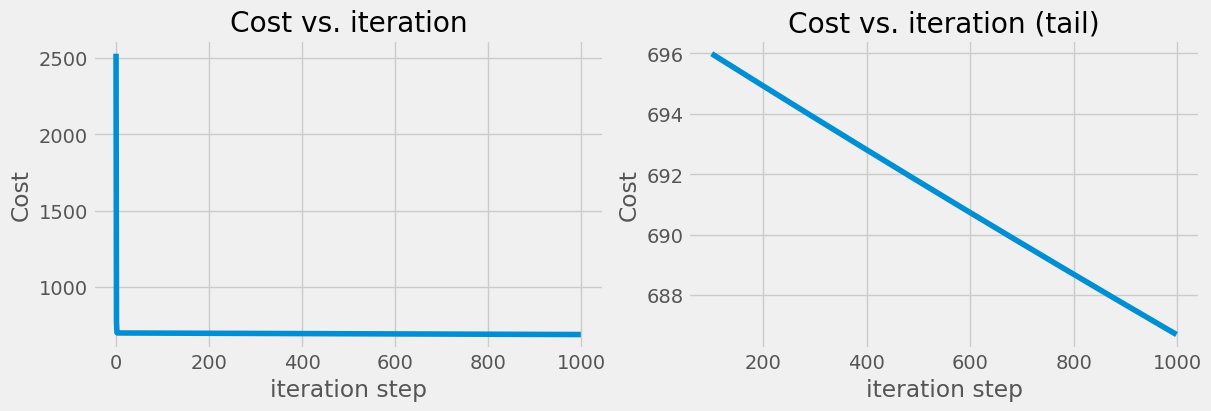

In [ ]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

Diese Ergebnisse sind nicht besonders überzeugend!  

Die Kostenfunktion nimmt zwar weiterhin ab, aber unsere Vorhersagen sind noch nicht sehr genau.  

Im nächsten Lab werden wir untersuchen, wie wir dies verbessern können.


# 6 Glückwunsch!  

In diesem Lab hast du:  

- Die Routinen für lineare Regression weiterentwickelt, nun mit mehreren Variablen.  
- `np.dot` von NumPy genutzt, um die Implementierungen zu vektorisieren.  
